# Support Vector Machine

The dataset will be the classic diabetes food dataset, which contains nutrition informations about foods. The objective is to classify, what a food a diabetic patient should choose. More often or less often. 

## Support vector machine overview

Support Vector Machines (SVM) try to find the best possible line (or boundary) that separates different groups in the data. This boundary is placed in a way that leaves the most space (or margin) between itself and the closest data points. These closest points are called support vectors. By leaving more space, the model becomes more flexible and is more likely to make correct predictions on new, unseen data.

## Support Vector Machine Kernels

Support Vector Machines (SVM) can also handle more complex data where groups can't be separated by a straight line. To do this, SVM uses something called the "kernel trick." A kernel is a special function that helps the model understand relationships between data points in a more flexible way—kind of like measuring how similar two things are. This lets SVM work as if it were looking at the data in a higher-dimensional space, without actually having to move the data there. This makes it possible to separate complex patterns more effectively.

# Example

vectors $x = (x_{1}, x_{2})$ and $y = (y_{1}, y_{2})$

Polynomia kernel: $$k(x, y) = (x^Ty)^2$$

Apply kernel on vector: $$k(x, y) = (x^Ty)^2 = (x_{1}y_{1} + x_{2}y_{2})^2 = x_{1}^2y_{1}^2 + x_{2}^2y_{2}^2 + 2x_{1}x_{2}y_{1}y_{2}$$

It can be seen as a dot-product between two higher-dimensional vectors (`3-dimensional`): $$\hat{x} = (x_{1}^2, x_{2}^2, \sqrt{2}x_{1}x_{2}) $$

$$\hat{y} = (y_{1}^2, x_{2}^2, \sqrt{2}y_{1}y_{2})$$


When using a kernel, the SVM doesn’t actually move the data into a more complex (higher-dimensional) space—it just acts like it did. The kernel function does a kind of shortcut: it calculates how similar two data points are as if they were transformed into that higher space, without doing all the heavy lifting. This allows SVM to separate complex data patterns by drawing clear boundaries in that “imaginary” higher-dimensional space—even when those patterns can’t be separated by a straight line in the original data.


In [2]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [4]:
rs = 42

In [5]:
# Load the dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items_binary.csv"
food_df = pd.read_csv(dataset_url)
food_df.head(2)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,0


In [6]:
# Get the row entries with col 0 to -1 (16), get the feature columns
feature_cols = list(food_df.iloc[:, :-1].columns)
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [7]:
X = food_df.iloc[:, :-1]
y = food_df.iloc[:, -1:]

In [8]:
X.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,105.098835,2.318235,0.368920,0.309216,0.264116,0.007069,4.308679,235.053659,15.510719,1.806074,3.734756,0.059039,4.298975,6.636733,6.487237,3.937688,5.510014
std,77.224368,3.438941,0.737164,1.310260,2.848250,0.094783,14.788162,252.438163,14.028570,4.099947,5.013685,0.771173,5.349881,19.658111,19.566500,7.892694,9.855960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.700000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,13.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,140.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,375.500000,24.000000,3.000000,5.000000,0.000000,6.000000,6.000000,4.000000,4.000000,8.000000
max,2210.000000,24.000000,8.000000,16.800000,235.000000,2.500000,450.000000,2220.000000,270.000000,305.000000,39.000000,19.000000,70.000000,370.000000,280.000000,110.000000,100.000000


In [9]:
# # Get the row entries with the last col 'class'
y.value_counts(normalize=True)

class
0        0.870402
1        0.129598
Name: proportion, dtype: float64

<Axes: xlabel='class'>

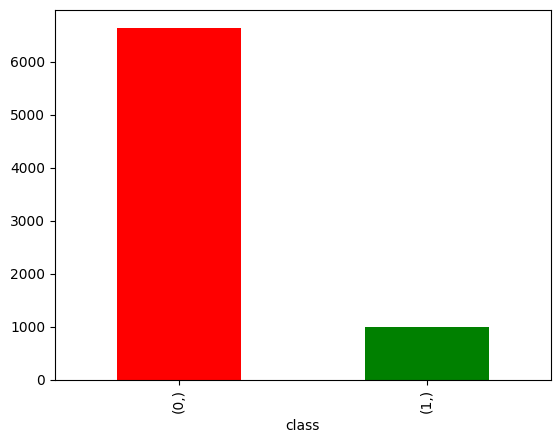

In [10]:
y.value_counts().plot.bar(color=['red', 'green'])

The dataset is imbalanced

# SVM Model with default parameters

In [11]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [12]:
model = SVC()
# It converts a column vector (2D array) of target values into a 1D flat array.
model.fit(X_train, y_train.values.ravel())

SVC()

In [13]:
# Make predictions
preds = model.predict(X_test)

 Evaluate the model performance

In [14]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [15]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9679319371727748,
 'recall': 0.8434343434343434,
 'precision': 0.9027027027027027,
 'f1score': 0.8720626631853786}

| **Metric**    | **Value** | **What It Means**                                                            |
| ------------- | --------- | ---------------------------------------------------------------------------- |
| **Accuracy**  | 0.9679    | The model correctly predicted 96.79% of all cases.                           |
| **Recall**    | 0.8434    | Out of all actual positive cases, 84.34% were correctly identified.          |
| **Precision** | 0.9027    | Of all cases predicted as positive, 90.27% were actually positive.           |
| **F1 Score**  | 0.8721    | The harmonic mean of precision and recall — shows a balance between the two. |

# Task 2: Train SVM with different regularization parameters and kernels

The `SVC` model provided by sklearn has two important arguments to be tuned: regularization parameter `C` and `kernel`.

What does the C parameter do in SVM?

The C parameter controls how much the model cares about getting every training point right versus keeping the decision boundary smooth and simple.

If C is large, the model tries very hard to avoid mistakes — but it may end up fitting the training data too closely (overfitting).

If C is small, the model allows some mistakes on the training data — but it usually ends up being more general and better at handling new, unseen data.

What is the kernel in SVM?

The kernel tells the SVM how to handle complex patterns in the data. It helps the model find the right boundary by transforming the data into a higher-dimensional space, where it’s easier to separate different classes.

| **Kernel** | **Name**                         | **What It Does**                                                                |
| ---------- | -------------------------------- | ------------------------------------------------------------------------------- |
| `rbf`      | Radial Basis Function (Gaussian) | Handles circular or complex boundaries. Most commonly used default kernel.      |
| `poly`     | Polynomial Kernel                | Creates curved boundaries depending on the degree of the polynomial.            |
| `sigmoid`  | Sigmoid Kernel                   | Similar to how neurons work in neural networks. Less commonly used in practice. |


`C = 10` and ` kernel = 'rbf'  `

In [16]:
model = SVC(C=10, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9679319371727748,
 'recall': 0.8636363636363636,
 'precision': 0.8860103626943006,
 'f1score': 0.8746803069053708}

| **Metric**    | **Value** | **What It Means**                                                    |
| ------------- | --------- | -------------------------------------------------------------------- |
| **Accuracy**  | 0.9679    | The model correctly predicted 96.79% of all cases.                   |
| **Recall**    | 0.8636    | Out of all actual positive cases, 86.36% were correctly identified.  |
| **Precision** | 0.8860    | Of all cases predicted as positive, 88.60% were actually correct.    |
| **F1 Score**  | 0.8747    | A balanced score showing the trade-off between precision and recall. |

Model performs very well overall. It's accurate (97%), and also balances well between catching most of the true positives (recall ~86%) and not making too many false alarms (precision ~89%). The F1 score (~87%) confirms it's reliable and generalizes well.

### Coding Exercise: Try different `C` values and `kernels` to see which combination produces SVM models with better classification performance.


In [17]:
model = SVC(C=15, kernel='poly')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.8717277486910995,
 'recall': 0.04040404040404041,
 'precision': 0.5714285714285714,
 'f1score': 0.07547169811320754}

| **Metric**    | **Value** | **What It Means**                                                   |
| ------------- | --------- | ------------------------------------------------------------------- |
| **Accuracy**  | 0.8717    | About **87%** of predictions were correct overall.                  |
| **Recall**    | 0.0404    | The model correctly found **only 4%** of the actual positive cases. |
| **Precision** | 0.5714    | Of the cases the model predicted as positive, **57% were correct**. |
| **F1 Score**  | 0.0755    | A very low score — shows poor balance between precision and recall. |



In [ ]:
# Parameter grids
#C_values = [0.01, 0.1, 1, 10]
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# To store results
#results = []

# Loop through combinations
#for c in C_values:
 #   for kernel in kernels:
  #      model = SVC(C=c, kernel=kernel, gamma='auto')
   #     model.fit(X_train, y_train)
    #    y_pred = model.predict(X_test)

        # Evaluate
      #  accuracy = accuracy_score(y_test, y_pred)
     #   recall = recall_score(y_test, y_pred)
       # precision = precision_score(y_test, y_pred)
        #f1 = f1_score(y_test, y_pred)

        #results.append({
         #   'C': c,
          #  'kernel': kernel,
           # 'accuracy': accuracy,
           # 'recall': recall,
           # 'precision': precision,
           # 'f1score': f1
       # })

# Convert results to DataFrame
#results_df = pd.DataFrame(results)
#print(results_df.sort_values(by='f1score', ascending=False).reset_index(drop=True))

c:\Users\user\Desktop\algorithmic_trading\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\Desktop\algorithmic_trading\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\Desktop\algorithmic_trading\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\Desktop\algorithmic_trading\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vecto

## Plot SVM hyperplane and margin

It would be great to visualize the see actual hyperplains and margins learned in an SVM model.

Visualizing hyperplanes in more than 3 dimensions is difficult. So, to help illustrate how SVM works, we'll use a simpler example with just two features (a 2D space), where the separating boundary can be easily shown as a line.

In [18]:
simplified_food_df = food_df[['Calories', 'Dietary Fiber', 'class']]

In [19]:
X = simplified_food_df.iloc[:1000, :-1].values
y = simplified_food_df.iloc[:1000, -1:].values

Since one class has a lot more examples than the other, we remove some of those extra examples from Class = 0. This gives us a more balanced dataset that's easier to visualize and work with.


In [20]:
under_sampler = RandomUnderSampler(random_state=rs)
X_under, y_under = under_sampler.fit_resample(X, y)

c:\Users\user\Desktop\algorithmic_trading\venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\user\Desktop\algorithmic_trading\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [21]:
print(f"Dataset resampled shape, X: {X_under.shape}, y: {y_under.shape}")

Dataset resampled shape, X: (62, 2), y: (62,)


We use a tool called MinMaxScaler to resize all the feature values to the same scale. This helps us show the decision boundary and margins more clearly in the plot.



In [22]:
scaler = MinMaxScaler()
X_under = scaler.fit_transform(X_under)

In [23]:
linear_svm = SVC(C=1000, kernel='linear')
linear_svm.fit(X_under, y_under)

SVC(C=1000, kernel='linear')

We've also included a helper function that plots the decision boundary (the hyperplane), the support vectors, and the margins. Feel free to create your own version of this visualization if you're interested in customizing it.

In [24]:
def plot_decision_boundry(X, y, model):
    plt.figure(figsize=(16, 12))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

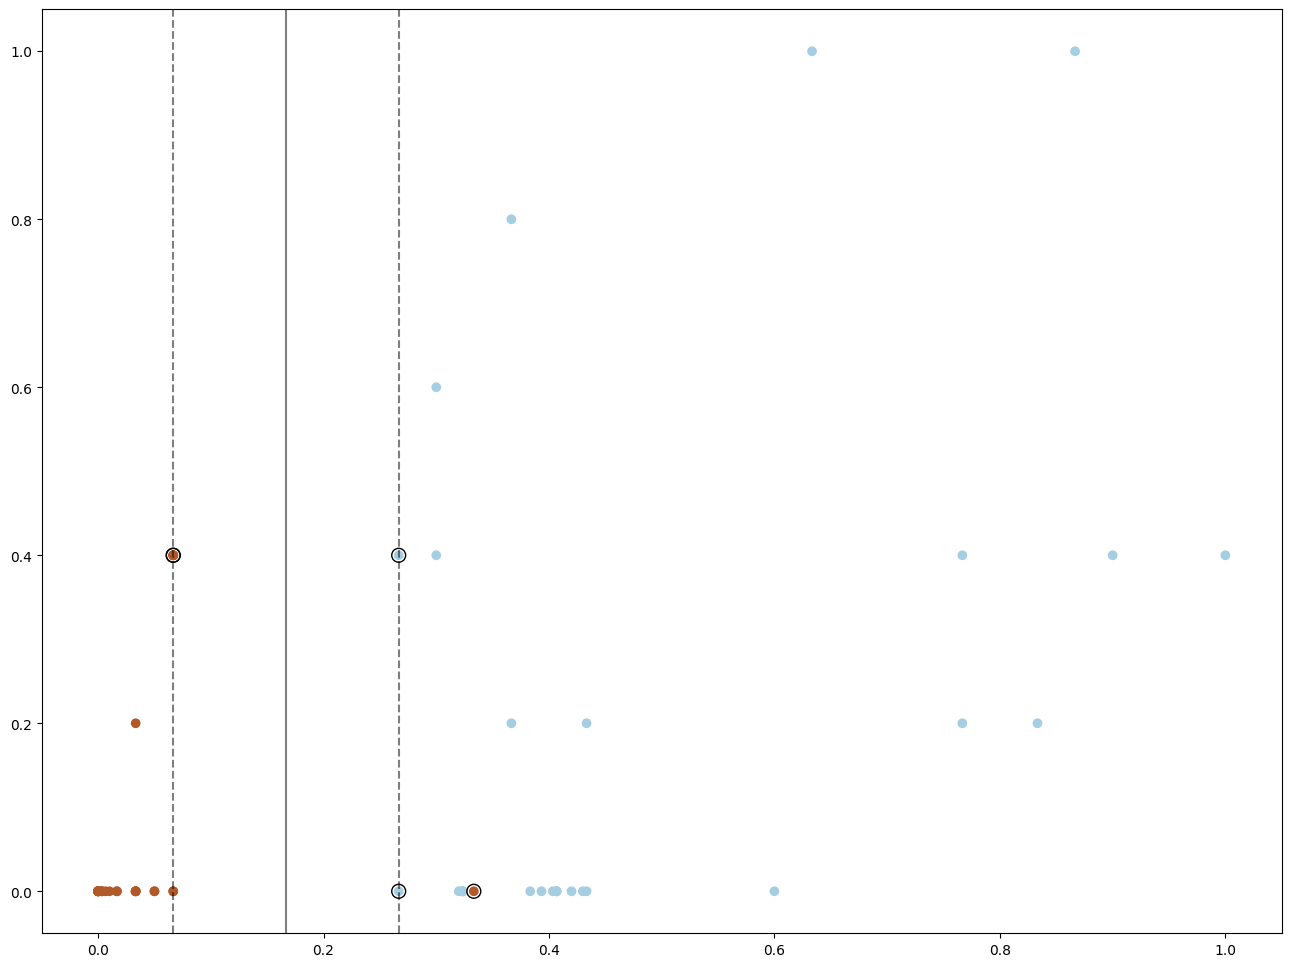

In [25]:
plot_decision_boundry(X_under, y_under, linear_svm)

As we can see, a clear straight line (the hyperplane) separates the two classes — blue dots vs. orange dots. The highlighted dots are the support vectors, which are the key points used to define this boundary.

If we use non-linear kernels, the decision boundary we get in 2D may be curved (non-linear), even though it's actually a straight line in a higher-dimensional space. To show this, we’ll use the rbf (Radial Basis Function) kernel, which is commonly used for capturing complex patterns.


In [26]:
svm_rbf_kernel = SVC(C=100, kernel='rbf')
svm_rbf_kernel.fit(X_under, y_under)

SVC(C=100)

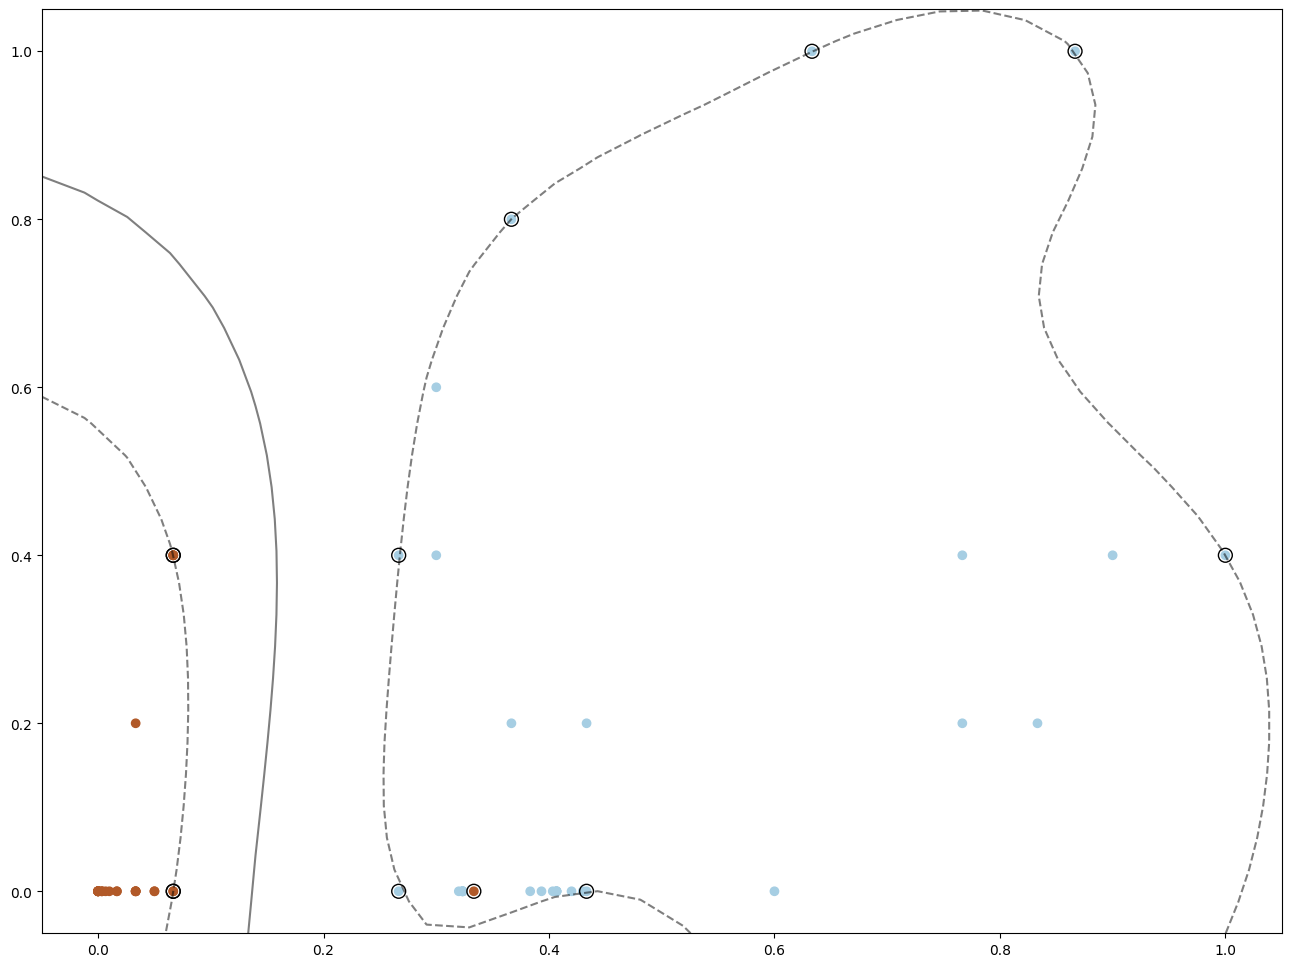

In [27]:
plot_decision_boundry(X_under, y_under, svm_rbf_kernel)